In [1]:
# 구현에 사용할 패키지 임포트하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

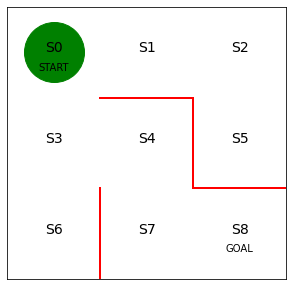

In [2]:
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~7, 열은 행동방향(상,우,하,좌 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, 1, np.nan],     # s0
                    [np.nan, 1, np.nan, 1],     # s1
                    [np.nan, np.nan, 1, 1],     # s2
                    [1, 1, 1, np.nan],          # s3
                    [np.nan, np.nan, 1, 1],     # s4
                    [1, np.nan, np.nan, np.nan],# s5
                    [1, np.nan, np.nan, np.nan],# s6
                    [1, 1, np.nan, np.nan],     # s7
                    ])                          # s8은 목표지점이므로 정책이 없다 

In [4]:
# 가치 반복 알고리즘에서 사용할 행동가치 함수를 표형식 표현으로 구현함
# 행은 상태 s, 열은 행동 a를 나타내는 형태 -> 행동가치 함수 Q(s,a)
# 실제 행동가치는 우리가 알 수 없으므로 초기 상태로 난수값을 부여함
# 행동가치 함수 Q의 초기 상태

[a,b] = theta_0.shape  # 열과 행의 개수를 변수 a,b에 저장함
Q = np.random.rand(a,b)*theta_0  # theta_0를 곱하는 이유 : 난수 중에 벽에 해당하는 부분을 np.nan으로 바꿔주기 위함임
#                                  *theta_0으로 요소 단위 곱셈을 수행함 -> Q에서 벽 방향으로 이동하는 행동에는 nan을 부여함

In [5]:
# 정책 파라미터 theta_0을 무작위 행동 정책 pi로 변환하는 함수

def simple_convert_into_pi_frome_theta(theta):
    '''단순 비율 계산'''
    
    [m,n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m,n))
    
    for i in range(0,m):
        pi[i,:] = theta[i,:]/np.nansum(theta[i,:])  # 비율을 계산함
    
    pi = np.nan_to_num(pi)  # nan을 0으로 변환함
    
    return pi

# 무작위 행동정책 pi_0을 계산함
pi_0 = simple_convert_into_pi_frome_theta(theta_0)

In [6]:
# get_action : 행동을 결정하는 함수
# get_s_next : 행동을 인자로 받아 다음 상태를 구하는 함수
# epsilon-greedy 알고리즘을 구현함

def get_action(s,Q,epsilon,pi_0):
    direction = ["up", "right", "down", "left"]
    
    # 행동을 결정함
    if np.random.rand() < epsilon:
        # 확률 epsilon으로 무작위 행동을 선택함
        next_direction = np.random.choice(direction, p=pi_0[s,:])
    else:
        # Q값이 최대가 되는 행동을 선택함
        next_direction = direction[np.nanargmax(Q[s,:])]
        
    # 행동을 인덱스로 변환함
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
    
    return action

def get_s_next(s,a,Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]  # 행동 a의 방향
    
    # 행동으로 다음 상태를 결정함
    if next_direction == "up":
        s_next = s-3  # 위로 이동하면 상태값이 3만큼 줄어듦
    elif next_direction == "right":
        s_next = s+1  # 오른쪽으로 이동하면 상태값이 1만큼 늘어남
    elif next_direction == "down":
        s_next = s+3  # 아래로 이동하면 상태값이 3만큼 늘어남
    elif next_direction == "left":
        s_next = s-1  # 왼쪽으로 이동하면 상태값이 1만큼 줄어듦
    
    return s_next

In [7]:
# Q-Learning 알고리즘으로 행동가치 함수 Q를 수정함

def Q_learning(s,a,r,s_next,Q,eta,gamma):
    if s_next == 8:  # 목표 지점에 도달한 경우
        Q[s,a] = Q[s,a] + eta*(r-Q[s,a])
    else:
        Q[s,a] = Q[s,a] + eta*(r + gamma*np.nanmax(Q[s_next,:]) - Q[s,a])
        
    return Q

In [8]:
# 행동가치 함수 Q의 초기 상태
# Q-Learning으로 미로를 빠져나올 때, 각 에피소드마다 상태가치 함수 V의 값을 구하도록 함
[a,b] = theta_0.shape  # 열과 행의 개수를 a,b 변수에 저장함
Q = np.random.rand(a,b) * theta_0 * 0.1  # Q 값의 초기값이 크면 애니메이션으로 나타내기 어려우므로 Q 값을 줄임

In [9]:
# Q-Learning 알고리즘으로 미로를 빠져 나오는 함수
# 상태, 행동. Q값의 히스토리를 출력함

def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # 시작 지점
    a = a_next = get_action(s,Q,epsilon,pi)  # 첫 번째 행동
    s_a_history = [[0, np.nan]]  # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트
    
    while(1):  # 목표 지점에 이를 때까지 반복함
        a = a_next  # 행동을 결정함
        
        s_a_history[-1][1] = a
        # 현재 상태(마지막이므로 인덱스가 -1임)를 히스토리에 추가함
        
        s_next = get_s_next(s,a,Q,epsilon,pi)
        # 다음 단계의 상태를 구함
        
        s_a_history.append([s_next, np.nan])
        # 다음 상태를 히스토리에 추가함
        # 행동은 아직 알 수 없으므로 nan으로 둠
        
        # 보상을 부여하고 다음 행동을 계산함
        if s_next == 8:
            r=1  # 목표 지점에 도달했다면 보상을 부여함
            a_next = np.nan
        else:
            r=0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 다음 행동 a_next를 계산함
            
        # 가치함수를 수정함
        Q = Q_learning(s,a,r,s_next,Q,eta,gamma)
        
        # 종료 여부를 판정함
        if s_next == 8:
            break
        else:
            s=s_next
        
    return [s_a_history,Q]

In [10]:
# Q-Learning 알고리즘으로 미로 빠져나오기

eta = 0.1                       # 학습률
gamma = 0.9                     # 시간 할인율
epsilon = 0.5                   # epsilon-greedy 알고리즘 epsilon 초기값
v = np.nanmax(Q, axis=1)        # 각 상태마다 가치의 최대값을 계산함
is_continue = True
episode = 1
V = []                          # 에피소드별로 상태가치를 저장함
V.append(np.nanmax(Q,axis=1))    # 상태별로 행동가치의 최대값을 계산함

while is_continue:  # is_continue 의 값이 False가 될 때까지 반복함
    print("에피소드 : "+str(episode))
    
    # epsilon 값을 조금씩 줄임
    epsilon = epsilon/2
    
    # Q-Learning으로 미로를 빠져나온 후, 결과로 나온 행동 히스토리와 Q값을 변수에 저장함
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q,epsilon,eta, gamma, pi_0)
    
    # 상태가치의 변화
    new_v = np.nanmax(Q,axis=1)       # 각 상태마다 행동가치의 최대값을 계산함
    print(np.sum(np.abs(new_v - v)))  # 상태가치 함수의 변화를 출력함
    v = new_v
    V.append(v)  # 현재 에피소드가 끝난 시점의 상태가치 함수를 추가함
    
    print("목표 지점에 이르기까지 걸린 단계 수는 "+str(len(s_a_history)-1) + "단계입니다")
    
    # 100 에피소드를 반복함
    episode = episode + 1
    if episode > 100:
        break

에피소드 : 1
0.2653495559630102
목표 지점에 이르기까지 걸린 단계 수는 230단계입니다
에피소드 : 2
0.13241525595157017
목표 지점에 이르기까지 걸린 단계 수는 104단계입니다
에피소드 : 3
0.13762144007728647
목표 지점에 이르기까지 걸린 단계 수는 210단계입니다
에피소드 : 4
0.09255676938069143
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
에피소드 : 5
0.09138911856207363
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 6
0.09041463600339172
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 7
0.08940222527467519
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 8
0.0883467494376375
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 9
0.08724216103788729
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 10
0.08608242368860389
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 11
0.08486214399227784
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 12
0.08357697852603119
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 13
0.08222386851025261
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 14
0.08080114469978728
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 15
0.07930853666798009
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 16
0.07774711372872921
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 17
0.07611917903204529
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피

In [11]:
# 에이전트의 이동을 애니메이션으로 시각화함
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm  # color map

def init():
    # 배경 이미지를 초기화함
    line.set_data([],[])
    return (line,)

def animate(i):
# 프레임 단위로 이미지를 생성함
# 각 칸에 상태가치 값으로 결정된 색을 칠함
    line, = ax.plot([0.5], [2.5], marker="s", color = cm.jet(V[i][0]), markersize=85)  # S0
    line, = ax.plot([1.5], [2.5], marker="s", color = cm.jet(V[i][1]), markersize=85)  # S1
    line, = ax.plot([2.5], [2.5], marker="s", color = cm.jet(V[i][2]), markersize=85)  # S2
    line, = ax.plot([0.5], [1.5], marker="s", color = cm.jet(V[i][3]), markersize=85)  # S3
    line, = ax.plot([1.5], [1.5], marker="s", color = cm.jet(V[i][4]), markersize=85)  # S4
    line, = ax.plot([2.5], [1.5], marker="s", color = cm.jet(V[i][5]), markersize=85)  # S5
    line, = ax.plot([0.5], [0.5], marker="s", color = cm.jet(V[i][6]), markersize=85)  # S6
    line, = ax.plot([1.5], [0.5], marker="s", color = cm.jet(V[i][7]), markersize=85)  # S7
    line, = ax.plot([2.5], [0.5], marker="s", color = cm.jet(1.0), markersize=85)      # S8
    return (line,)

# 초기화 함수와 프레임 단위로 그림을 그리는 함수로 애니메이션을 생성함
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(V), interval = 200, repeat = False)

HTML(anim.to_jshtml())